# Exam 2023 - JPS 

**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import sympy as sm

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
from examprojectQ1 import solve_L
solve_L(1.0, 0.3) #Parameters are wage and tax rate

For G = 1.0, optimal labor supply = [15.30168457]
For G = 2.0, optimal labor supply = [15.30168457]
L* = 15.30165022719559


For $L^{\star}(\tilde{w})$ we get that the optimal labor supply choise is 15.3, where is set to $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

The plot shows the relationship between $L^{\star}(\tilde{w})$ and $w$. $L^{\star}$ increases exponentially until reaching the optimal labor supply choice. When the wage is low, there is a lower incentive to work, resulting in a smaller labor supply. When the wage is high, the labor supply increases since more people are motivated to work for a higher wage. This positive relationship between wage and labor supply is reflected in the plot, showing the upward trend of $L^{\star}(\tilde{w})$ as $w$ increases.

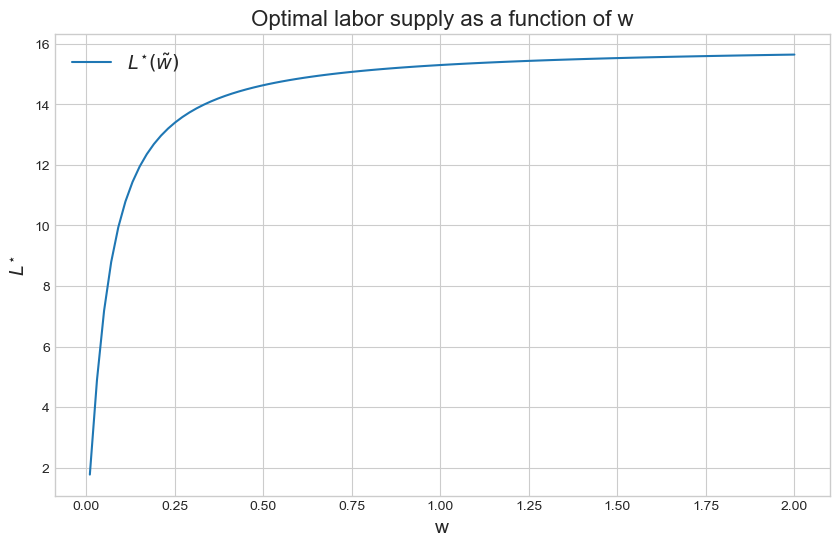

In [3]:
from examprojectQ1 import plot_Q2
plot_Q2(0.3) #Parameter is tax rate


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


/Users/joakimhagerupjensen/Desktop/Programming/projects-2023-jps/examproject/examprojectQ1.py:22: RuntimeWarning: divide by zero encountered in log
  return np.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2
/Users/joakimhagerupjensen/Desktop/Programming/projects-2023-jps/examproject/examprojectQ1.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


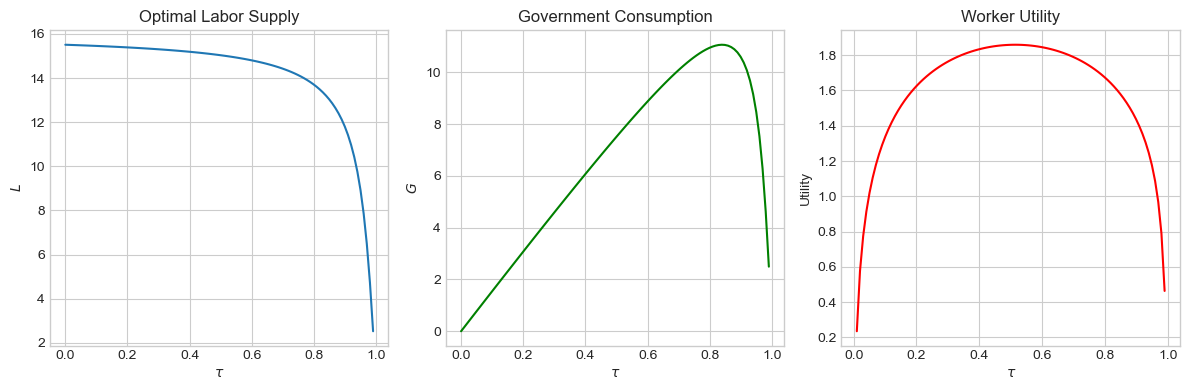

In [4]:
from examprojectQ1 import plot_on_tau
plot_on_tau(1.0) #Parameter is wage

The first plot shows the labor supply decreases with the tax rate $\tau$ as the incentive to work decreases. This is for strictly positive values of $\tau$, as there is no positive utility without government consumption.

In the second plot the government consumption which is defined by tax revenue will increase with and tax rates ceteris paribus. The negative effect of decreasing labour supply will however at some point overpower the positive effect of increasing tax rate. Without labour there can be no labour-income tax. Due to the fact that government consumption is equal to tax revenue, this can also be interpreted as a laffer curve. Even if you aimed to optimize government spending without regard for anything else it would be counterproductive to chosse a tax rate beyond the maximum of this curve.

The third plot shows the relationship between worker utility and tax rates. Worker utility increases until it reaches the socially optimal tax rate
However, beyond this optimal point, worker utility starts to decline as tax rates increase.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

Optimal tax rate: 0.51


/Users/joakimhagerupjensen/Desktop/Programming/projects-2023-jps/examproject/examprojectQ1.py:22: RuntimeWarning: divide by zero encountered in log
  return np.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2
/Users/joakimhagerupjensen/Desktop/Programming/projects-2023-jps/examproject/examprojectQ1.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


0.51

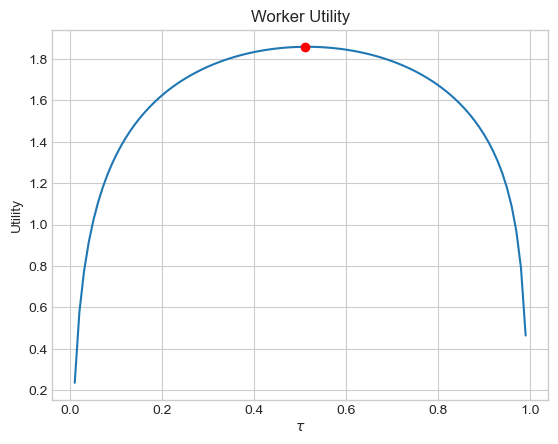

In [5]:
from examprojectQ1 import max_of_tau
max_of_tau(1.0, True) #Parameters are wage and a boolean value determining wheter or not to plot the function

As illustrated on the graph, the social optimally optimal tax rate is 0.51.
With $\alpha = 0.5$ the optimal weight between private an government counsumption is effectively a maxmin-function. Due to the extra private consumption from $\kappa$ the tax rate compensates slightly towards government consumption.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.



In [6]:
from examprojectQ1 import solve_G
# Parameters are wage, tax rate, sigma, rho and epsilon
print(f"Government consumption G for parameter set 1: {solve_G(1.0, max_of_tau(1.0, False), 1.001, 1.001, 1.0):.2f}")
print(f"Government consumption G for parameter set 2: {solve_G(1.0, max_of_tau(1.0, False), 1.5, 1.5, 1.0):.2f}")

Government consumption G for parameter set 1: 7.65
Government consumption G for parameter set 2: 4.94


/Users/joakimhagerupjensen/Desktop/Programming/projects-2023-jps/examproject/examprojectQ1.py:22: RuntimeWarning: divide by zero encountered in log
  return np.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2
/Users/joakimhagerupjensen/Desktop/Programming/projects-2023-jps/examproject/examprojectQ1.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


The Government consumption $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau=0.51$ for the parameter set 1 is 7.65 and for parameter set 2 it is 4.94.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
from examprojectQ1 import max_of_tau_new
# Parameters are wage, sigma, rho and epsilon
print(f"Socially optimal tax rate for parameter set 1: {max_of_tau_new(1.0, 1.001, 1.001, 1.0):.2f}")
print(f"Socially optimal tax rate for parameter set 2: {max_of_tau_new(1.0, 1.5, 1.5, 1.0):.2f}")

Socially optimal tax rate for parameter set 1: 0.51
Socially optimal tax rate for parameter set 2: 0.46


The socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$ is equal to 0.5 for parameter 1 and 0.46 for parameter set 2. We se that the optimal tax rate is the same for set 1 as it was in question 4 but lower for set 2.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [8]:
from examprojectQ2 import calculate_optimal_ell
calculate_optimal_ell()

The optimal ell_t =  [(kappa_t*(1 - eta)/w)**(1/eta)]


In [9]:
from examprojectQ2 import calculate_optimal_profit_num
calculate_optimal_profit_num()

The optimal hairdressers for kappa = 1 and 2: [0.250000000000000, 1.00000000000000]
Profit for kappa = 1: 0.250000000000000
Profit for kappa = 2 1.00000000000000


When using sympy we get the optimal solution for $\ell_t$ to be equal $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ and when we insert $\kappa\in\left\{1.0 , 2.0\right\}$ We get that the optimal haircuts for $\kappa = 1$ is $0.25$ with af profit of $0.25$ for $\kappa = 2$ the optimal haircuts is $1$ with a profit of $1$. 

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [10]:
from examprojectQ2 import calculate_profit
calculate_profit()

The expected profit is 27.71


With our approximation we get an expected profit for the hair salon of $27.71$ 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [11]:
from examprojectQ2 import calculate_new_profit
calculate_new_profit()

New expected profit: 28.26


When we add the new policies with the else/if statement we get an increase in profits to $28.26$

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

Optimal delta: 0.076
Maximum expected profit: 28.505


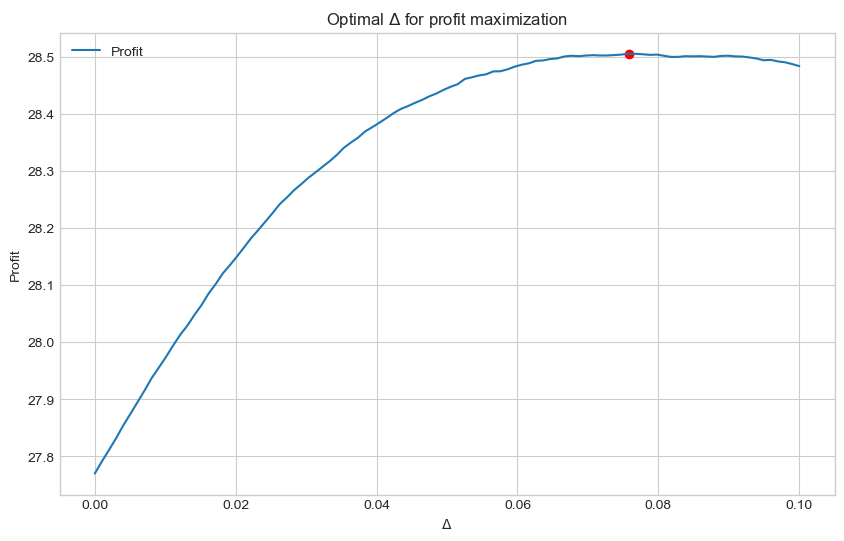

In [12]:
from examprojectQ2 import calculate_optimal_delta
calculate_optimal_delta()

This suggest an optimal $\Delta$ of $0.076$ with a profit of $28.505$


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [13]:
from examprojectQ2 import calculate_expected_profit_discount_rate
calculate_expected_profit_discount_rate()

New expected profit: 29.53


When we change the rent we get an increse in profits to $29.52$ which is understandable since we lover the montly rent and therefore profits will have a higher present value. 

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

To avoid the abundance of global minima in the Griewank function the refined global optimizer applies a combination of 'shot gun' optimization and a Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm. It uses $\underline{K}$ random numbers as starting seeds for the BFGS optimization. The best of these optimised starting seeds is then chosen. After this point new random starting seeds are chosen, but the best of the previous starting seeds are now weighted into the new one which is then optimized. As the certainty that we have found the correct minima increases with the number of interations, the weight that we apply to the previous best value increases and the weight of the random 'shot gun' component in the new seeds decrease. The optimizer ends, when the function values are below the chosen tolerance level $\tau$ or when it reaches the maximum number of iterations $K$.

As settings we choose:

* Initial guesses $\mathbf{x}^k = (x_1^k,x_2^k)'$ where $x_1^k,x_2^k \in  [-600,600]$
* Tolerance $\tau = 10^{-8}$
* *warm-up iterations* $\underline{K}=10$
* *maximum number of iterations* $K=1000$

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We optimize a two dimensional Griewank function, which is why $\mathbf{x}$ is a vector $(x_1,x_2)'$. Below we plot the guesses $\mathbf{x}^{k0}$ for each iteration $k$. In the first figure we plot both $x_1^{k0}$ and $x_2^{k0}$ on the same axis, while we plot $\mathbf{x}^{k0}$ in two dimensions on the right.

x*=(x1*,x2*)=(-9.8e-09, -7e-09)
Last period = 252


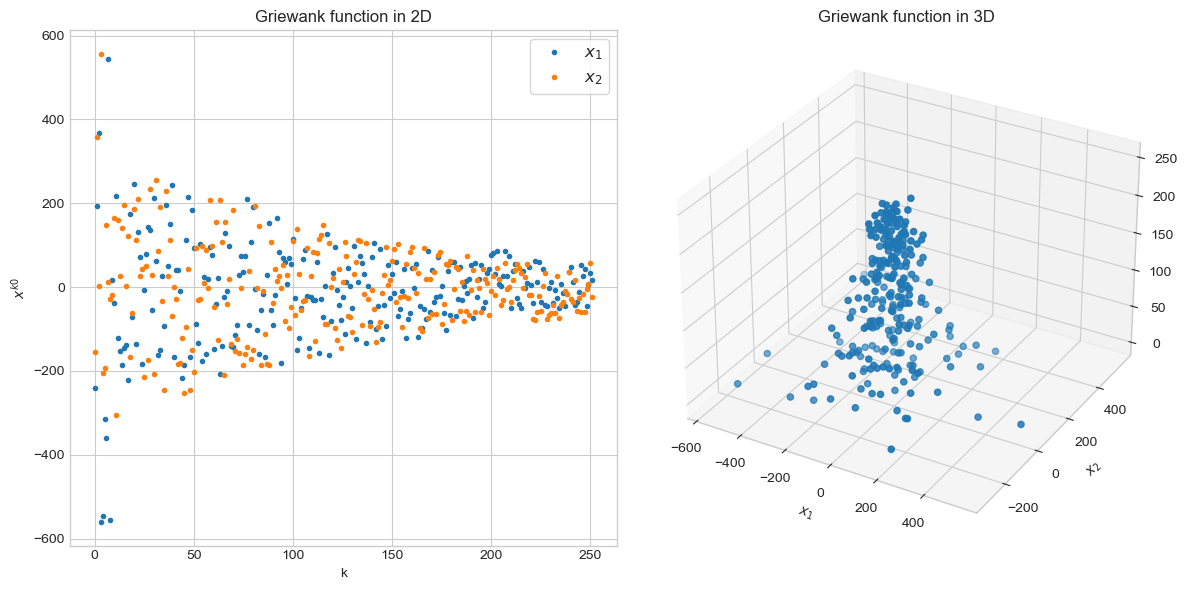

In [14]:
from examprojectQ3 import griewank_solve
griewank_solve(10)

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

x*=(x1*,x2*)=(-4.3e-08, -7.6e-08)
Last period = 407


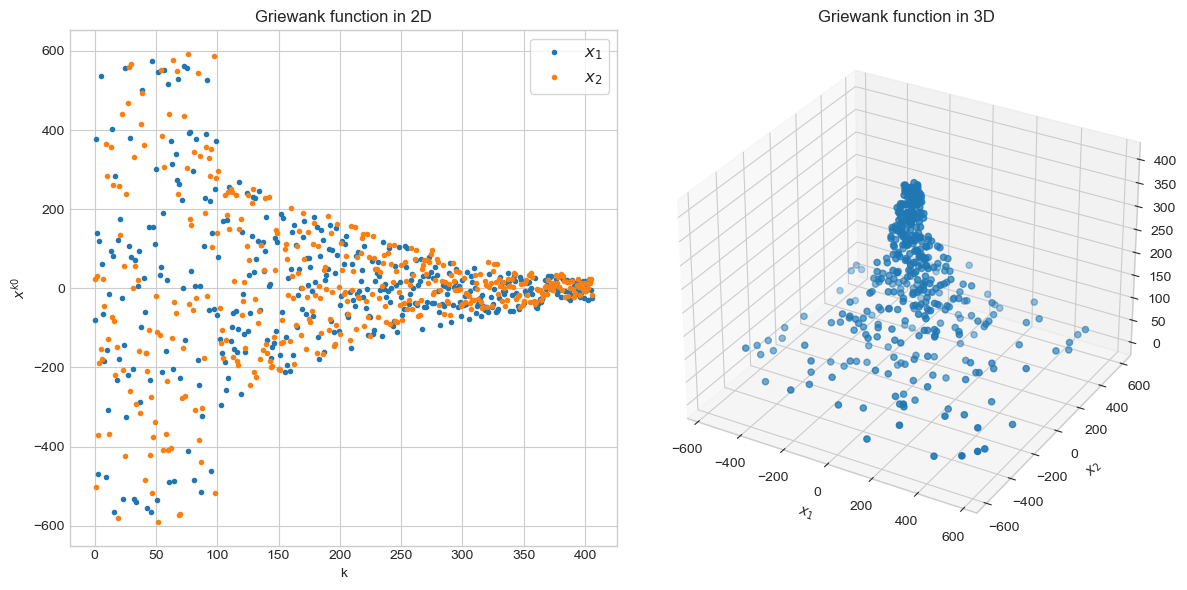

In [15]:
from examprojectQ3 import griewank_solve
griewank_solve(100)

Increasing $\underline{K}$ should increase the propability that we find the global minima, but since we find af minina that is below the tolerance in both questions, raising $\underline{K}$ does not improve the function. It only increases the expected number of iterations needed.